# Máster en Big Data y Data Science

# Metodologías de gestión y diseño de proyectos de big data

## Seminario II - Actividades de Comprensión de los Datos

---

### Sprint 1

### Carga de librerias a utilizar

In [ ]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
%matplotlib inline

### Lectura de los datasets

In [ ]:
#Lectura del dataset
from google.colab import files
uploaded = files.upload()
academicos = pd.read_csv(io.BytesIO(uploaded['datos_academicos.csv']))
academicos.head()

Saving datos_academicos.csv to datos_academicos.csv


,Unnamed: 0,unidad_academica,carrera,nro_inscripcion,regular,cnt_readmisiones,calidad,anio_plan_estudios,fecha_ingreso_alumno
0,0,FCEQN,170,FCEQN-3342,S,0.0,A,2005.0,02/28/2011
1,1,FCEQN,102,FCEQN-5396,S,0.0,A,2005.0,12/12/2010
2,2,FCEQN,143,FCEQN-3162,S,0.0,A,2008.0,07/03/2011
3,3,FCEQN,106,FCEQN-5739,S,0.0,A,2008.0,12/03/2011
4,4,FCEQN,172,4683,S,0.0,A,2005.0,03/15/2011


In [ ]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
uploaded = files.upload()
personas = pd.read_csv(io.BytesIO(uploaded['datos_personas.csv']))
personas.head()

Saving datos_personas.csv to datos_personas.csv


,Unnamed: 0,unidad_academica,nro_inscripcion,sexo,nacionalidad,fecha_nac_alumno,fecha_egr_sec
0,0,FCEQN,FCEQN-877,2,1.0,1987,2004
1,1,FCEQN,FCEQN-1294,2,1.0,1987,2017
2,2,FCEQN,FCEQN-1351,1,1.0,1987,2011
3,3,FCEQN,FCEQN-1363,2,1.0,1987,2011
4,4,FCEQN,FCEQN-1367,2,1.0,1987,2011


In [ ]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
uploaded = files.upload()
censales = pd.read_csv(io.BytesIO(uploaded['datos_censales.csv']))
censales.head()

Saving datos_censales.csv to datos_censales.csv


,Unnamed: 0,ua,insc,estado_civil,sit_lab_alumno,tipo_res_alumno,sit_lab_padres,estudios_padres
0,0,FCEQN,FCEQN-3342,1.0,NC,-1.0,-1,-1.0
1,1,FCEQN,FCEQN-5396,1.0,NC,-1.0,-1,-1.0
2,2,FCEQN,FCEQN-3162,1.0,No,1.0,3,3.0
3,3,FCEQN,FCEQN-5739,3.0,NC,-1.0,-1,-1.0
4,4,FCEQN,4683,1.0,NC,-1.0,-1,-1.0


In [ ]:
pd.isnull(academicos).sum()

Unnamed: 0               0
unidad_academica         0
carrera                  2
nro_inscripcion          0
regular                 11
cnt_readmisiones        11
calidad                 10
anio_plan_estudios       6
fecha_ingreso_alumno     5
dtype: int64

In [ ]:
pd.isnull(personas).sum()

Unnamed: 0          0
unidad_academica    0
nro_inscripcion     0
sexo                0
nacionalidad        0
fecha_nac_alumno    0
fecha_egr_sec       0
dtype: int64

In [ ]:
pd.isnull(censales).sum()

Unnamed: 0         0
ua                 0
insc               0
estado_civil       0
sit_lab_alumno     0
tipo_res_alumno    0
sit_lab_padres     0
estudios_padres    0
dtype: int64

### Obtención de meta-datos

In [ ]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [ ]:
from google.colab import files
uploaded = files.upload()
integrado = pd.read_csv(io.BytesIO(uploaded['datos_completos.csv']))
integrado.head()

Saving datos_completos.csv to datos_completos.csv


,Unnamed: 0,sexo,nacionalidad,edad,regular,cnt_readmisiones,calidad,inactividad,estado_civil,sit_lab_alumno,tipo_res_alumno,sit_lab_padres,estudios_padres
0,0,2,1.0,33,S,1.0,A,1,1.0,NC,-1.0,-1,-1.0
1,1,2,1.0,35,N,2.0,A,6,1.0,NC,-1.0,-1,-1.0
2,2,1,1.0,35,N,2.0,P,1,1.0,N,1.0,3,3.0
3,3,2,1.0,34,N,2.0,A,1,3.0,NC,-1.0,-1,-1.0
4,4,2,1.0,38,S,1.0,A,1,1.0,NC,-1.0,-1,-1.0


In [ ]:
descripcionDatosDataset(integrado)

Cantidad de filas: 2283
Cantidad de columnas: 13
----------------------------------------------------------------------------------------------------
Columna: Unnamed: 0
Tipo de datos: numérico
Descripción de valores:
min          0.000000
max       2292.000000
mean      1145.750767
std        662.996501
median    1149.000000
Name: Unnamed: 0, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: sexo
Tipo de datos: numérico
Descripción de valores:
min       1.000000
max       2.000000
mean      1.460797
std       0.498570
median    1.000000
Name: sexo, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: nacionalidad
Tipo de datos: numérico
Descripción de valores:
min      -1.000000
max       4.000000
mean      1.032413
std       0.211005
median    1.000000
Name: nacionalidad, dtype: float64
-----------------------------------------------------

In [ ]:
descripcionDatosDataset(academicos)

Cantidad de filas: 2316
Cantidad de columnas: 9
----------------------------------------------------------------------------------------------------
Columna: Unnamed: 0
Tipo de datos: numérico
Descripción de valores:
min          0.000000
max       2315.000000
mean      1157.500000
std        668.715934
median    1157.500000
Name: Unnamed: 0, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: unidad_academica
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['FCEQN']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: carrera
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['170' '102' '143' '106' '172' 'SAC' '114' '147' '101' '104']
-- Cantidad de nulos: 2 = 0.09%
---------------------------------------------------------------------------------------------

In [ ]:
descripcionDatosDataset(censales)

Cantidad de filas: 2316
Cantidad de columnas: 8
----------------------------------------------------------------------------------------------------
Columna: Unnamed: 0
Tipo de datos: numérico
Descripción de valores:
min          0.000000
max       2315.000000
mean      1157.500000
std        668.715934
median    1157.500000
Name: Unnamed: 0, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: ua
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['FCEQN']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: insc
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['FCEQN-3342' 'FCEQN-5396' 'FCEQN-3162' 'FCEQN-5739' '4683' 'FCEQN-5233'
 'FCEQN-5226' 'FCEQN-5117' 'FCEQN-5630' 'FCEQN-5644']
-- Cantidad de nulos: 0 = 0.00%
---------------------------------------------

In [ ]:
descripcionDatosDataset(personas)

Cantidad de filas: 2316
Cantidad de columnas: 7
----------------------------------------------------------------------------------------------------
Columna: Unnamed: 0
Tipo de datos: numérico
Descripción de valores:
min          0.000000
max       2315.000000
mean      1157.500000
std        668.715934
median    1157.500000
Name: Unnamed: 0, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: unidad_academica
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['FCEQN']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: nro_inscripcion
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['FCEQN-877' 'FCEQN-1294' 'FCEQN-1351' 'FCEQN-1363' 'FCEQN-1367' '1527'
 'FCEQN-1532' 'FCEQN-1618' 'FCEQN-1647' 'FCEQN-1665']
-- Cantidad de nulos: 0 = 0.00%
---------------------

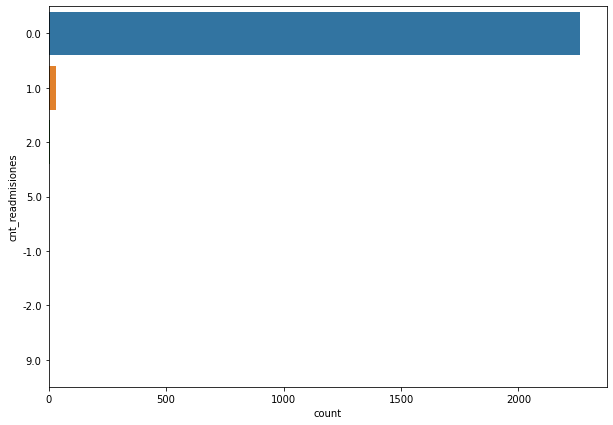

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.countplot(y=academicos['cnt_readmisiones'], order=academicos['cnt_readmisiones'].value_counts().index)
plt.show()

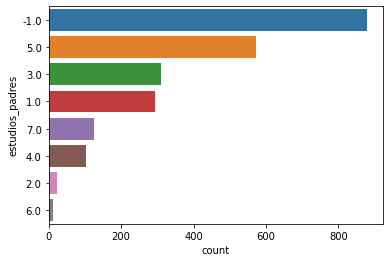

In [ ]:
sns.countplot(y=censales['estudios_padres'], order=censales['estudios_padres'].value_counts().index)

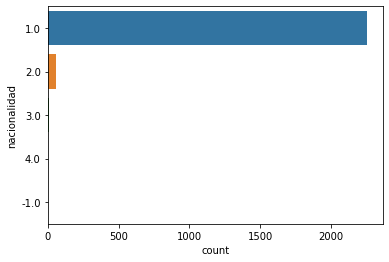

In [ ]:
sns.countplot(y=personas['nacionalidad'], order=personas['nacionalidad'].value_counts().index)

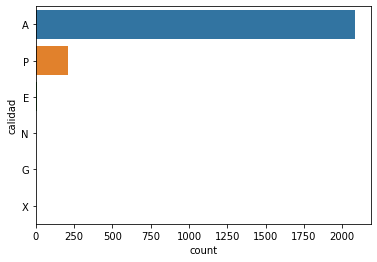

In [ ]:
sns.countplot(y=academicos['calidad'], order=academicos['calidad'].value_counts().index)

### Verificación de calidad

#### Todos los datasets

In [ ]:
censales.rename(columns={"insc":"nro_inscripcion"})

In [ ]:
def verificarFormatoMatricula(datos):
    datos['err_formato_matricula'] = datos['nro_inscripcion'].astype(str).str.match("\D{5}.\d{1,4}$")

    #A partir de esto se podría verificar a través de una nueva columna auxiliar
    conteo = datos[datos.err_formato_matricula == False]
    #Y se cuenta la cantidad de errores de formateo
    return conteo.shape[0], (conteo.shape[0] / datos.shape[0])

In [ ]:
print('Conteo de errores en el formato del atributo nro_inscripcion:')

res_academicos = verificarFormatoMatricula(academicos)
print(f"- Dataset: datos_academicos.csv => Cantidad: {res_academicos[0]} | {round(res_academicos[1],2)}%")

res_personas = verificarFormatoMatricula(personas)
print(f"- Dataset: datos_personas.csv => Cantidad: {res_personas[0]} | {round(res_personas[1],2)}%")

res_censales = verificarFormatoMatricula(censales)
print(f"- Dataset: datos_censales.csv => Cantidad: {res_censales[0]} | {round(res_censales[1],2)}%")

#### Datos académicos

In [ ]:
cantidad_filas_academicos = academicos.shape[0]

In [ ]:
''' 
Columna: carrera
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['143' '102' '114' '106' '170' '104' '147' '172' '601' '108']
-- Cantidad de nulos: 2 = 0.09%
'''

#Verificar que los valores de cada atributo se encuentren dentro de los listados anexos

valores = academicos.carrera.value_counts() #Conteo de ocurrencias por valor (not-null)
#print(valores)

academicos[academicos.carrera.isna()] #Para visualizar las tuplas con valores nulos
cantidad_nulos = len(academicos.carrera) - academicos.carrera.count() #Conteo de nulos

valores_validos = ['147',
'172',
'104',
'102',
'101',
'106',
'143',
'SAC',
'170',
'114',
'111',
'105',
'108'] #Se definen los valores validos según el anexo

cantidad_nulos #Impresión de la cantidad de nulos

#Se identifica y cuenta a los valores que no cumplen esa condición (incluye los nulos)

resultado = academicos[academicos.carrera.isin(valores_validos) == False] 
resultado

In [ ]:
def calcular_rangos_valores_carrera():
    carrera_valores_fuera_rango = resultado.shape[0]
    print(f"Cantidad de filas con valores fuera de rango en atributo carrera: {carrera_valores_fuera_rango}")
    
    indicador = (carrera_valores_fuera_rango / cantidad_filas_academicos)
    print(f"Porcentaje de filas con errores de rango de valores (atributo carrera): {round(indicador * 100, 2)} %")

calcular_rangos_valores_carrera()

Cantidad de filas con valores fuera de rango en atributo carrera: 8
Porcentaje de filas con errores de rango de valores (atributo carrera): 0.35 %


In [ ]:
'''
Columna: calidad
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['A' 'P' 'E' 'N' nan 'X' 'G']
-- Cantidad de nulos: 10 = 0.43%
'''
#Verificar que los valores de cada atributo se encuentren dentro de los listados anexos

valores = academicos.calidad.value_counts() #Conteo de ocurrencias por valor (not-null)
#print(valores)

academicos[academicos.calidad.isna()] #Para visualizar las tuplas con valores nulos
cantidad_nulos = len(academicos.calidad) - academicos.calidad.count() #Conteo de nulos

valores_validos = ['A','P'] #Se definen los valores validos según el anexo
resultado = academicos[academicos.calidad.isin(valores_validos) == False] 
resultado

In [ ]:
def calcular_rangos_valores_carrera():
    carrera_valores_fuera_rango = resultado.shape[0]
    print(f"Cantidad de filas con valores fuera de rango en atributo calidad: {carrera_valores_fuera_rango}")
    
    indicador = (carrera_valores_fuera_rango / cantidad_filas_academicos)
    print(f"Porcentaje de filas con errores de rango de valores (atributo calidad): {round(indicador * 100, 2)} %")

calcular_rangos_valores_carrera()

Cantidad de filas con valores fuera de rango en atributo carrera: 24
Porcentaje de filas con errores de rango de valores (atributo carrera): 1.04 %


In [ ]:
'''Columna: regular
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['S' 'N' nan 'X' 'T' 'SI' 'D']
-- Cantidad de nulos: 11 = 0.47%
'''
#Verificar que los valores de cada atributo se encuentren dentro de los listados anexos

valores = academicos.regular.value_counts() #Conteo de ocurrencias por valor (not-null)
#print(valores)

academicos[academicos.regular.isna()] #Para visualizar las tuplas con valores nulos
cantidad_nulos = len(academicos.regular) - academicos.regular.count() #Conteo de nulos
#cantidad_nulos

valores_validos = ['S','N'] #Se definen los valores validos según el anexo
resultado = academicos[academicos.regular.isin(valores_validos) == False] 
resultado

In [ ]:
def calcular_rangos_valores_carrera():
    carrera_valores_fuera_rango = resultado.shape[0]
    print(f"Cantidad de filas con valores fuera de rango en atributo regular: {carrera_valores_fuera_rango}")
    
    indicador = (carrera_valores_fuera_rango / cantidad_filas_academicos)
    print(f"Porcentaje de filas con errores de rango de valores (atributo regular): {round(indicador * 100, 2)} %")

calcular_rangos_valores_carrera()

Cantidad de filas con valores fuera de rango en atributo regular: 20
Porcentaje de filas con errores de rango de valores (atributo regular): 0.86 %


#### Datos censales

In [ ]:
cantidad_filas_censales = censales.shape[0]

In [ ]:
'''
Columna: sit_lab_alumno
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['NC' 'No' 'Si' '1' 'S' 'NO']
-- Cantidad de nulos: 0 = 0.00%
'''

#Verificar que los valores de cada atributo se encuentren dentro de los listados anexos

valores = pd.value_counts(censales.sit_lab_alumno) #Conteo de ocurrencias por valor (not-null)
#print(valores)

valores_validos = ['S', 'N', 'NC'] #Se definen los valores validos según el anexo

#Se identifica y cuenta a los valores que no cumplen esa condición (incluye los nulos)
resultado = censales[censales.sit_lab_alumno.isin(valores_validos) == False] 
resultado

,Unnamed: 0,ua,insc,estado_civil,sit_lab_alumno,tipo_res_alumno,sit_lab_padres,estudios_padres
2,2,FCEQN,FCEQN-3162,1.0,No,1.0,3,3.0
22,22,FCEQN,FCEQN-5580,1.0,No,1.0,-1,5.0
26,26,FCEQN,FCEQN-5765,1.0,No,1.0,3,4.0
33,33,FCEQN,FCEQN-5554,1.0,No,2.0,1,5.0
34,34,FCEQN,FCEQN-5774,1.0,No,2.0,3,1.0
...,...,...,...,...,...,...,...,...
2163,2163,FCEQN,FCEQN-4711,1.0,No,4.0,3,5.0
2169,2169,FCEQN,FCEQN-5253,1.0,Si,2.0,2,5.0
2264,2264,FCEQN,FCEQN-8901,1.0,No,2.0,-1,5.0
2277,2277,FCEQN,FCEQN-6057,1.0,No,1.0,-1,5.0


In [ ]:
def calcular_rangos_valores_sit_lab_alumno():
    sit_lab_alumno_valores_fuera_rango = resultado.shape[0]
    print(f"Cantidad de filas con valores fuera de rango en atributo sit_lab_alumno: {sit_lab_alumno_valores_fuera_rango}")
    
    indicador = (sit_lab_alumno_valores_fuera_rango / cantidad_filas_censales)
    print(f"Porcentaje de filas con errores de rango de valores (atributo sit_lab_alumno): {round(indicador * 100, 2)} %")

calcular_rangos_valores_sit_lab_alumno()

Cantidad de filas con valores fuera de rango en atributo sit_lab_alumno: 121
Porcentaje de filas con errores de rango de valores (atributo sit_lab_alumno): 5.22 %


#### Datos personas

In [ ]:
cantidad_filas_personas = personas.shape[0]

In [ ]:
'''
Columna: fecha_nac_alumno
Tipo de datos: numérico
Descripción de valores:
min        182.000000
max       1999.000000
mean      1980.153282
std        144.403554
median    1994.000000
Name: fecha_nac_alumno, dtype: float64
'''

#Atributo: fecha_nac_alumno
valores = pd.value_counts(personas['fecha_nac_alumno']) #Conteo de ocurrencias por valor (not-null)
#valores

personas[personas.fecha_nac_alumno.isna()] #Para visualizar las tuplas con valores nulos
cantidad_nulos = len(personas.fecha_nac_alumno) - personas.fecha_nac_alumno.count() #Conteo de nulos
cantidad_nulos

#Se identifica y cuenta a los valores que no cumplen las condiciones vistas
resultado = personas[personas.fecha_nac_alumno < 1950] 
resultado
menor_1950 = resultado.shape[0]

resultado = personas[personas.fecha_nac_alumno > 2006] 
resultado
mayor_2006 = resultado.shape[0]



In [ ]:
def calcular_rangos_valores_fecha_nac_alumno():
    fecha_nac_alumno_valores_fuera_rango = cantidad_nulos + menor_1950 + mayor_2006
    print(f"Cantidad de filas con valores fuera de rango en atributo fecha_nac_alumno: {fecha_nac_alumno_valores_fuera_rango}")
    
    indicador = (fecha_nac_alumno_valores_fuera_rango / cantidad_filas_personas)
    print(f"Porcentaje de filas con errores de rango de valores (atributo fecha_nac_alumno): {round(indicador * 100, 2)} %")

calcular_rangos_valores_fecha_nac_alumno()
print(f"{cantidad_nulos} + {menor_1950} + {mayor_2006}")

Cantidad de filas con valores fuera de rango en atributo fecha_nac_alumno: 17
Porcentaje de filas con errores de rango de valores (atributo fecha_nac_alumno): 0.73 %
0 + 17 + 0


#### Atributos pendientes de revisión

En función de los meta-datos obtenidos o de la experiencia previa con los datasets se podrían revisar los siguientes atributos en esta etapa:

* fecha_ingreso_alumno (datos_academicos)
* fecha_egr_sec (datos_persona)


In [ ]:
cantidad_filas_datos_academicos = academicos.shape[0]

In [ ]:
'''
Columna: fecha_egr_sec
Tipo de datos: numérico
Descripción de valores:
min        201.000000
max       2019.000000
mean      2009.807858
std         37.678975
median    2011.000000
Name: fecha_egr_sec, dtype: float64
'''

#Atributo: fecha_nac_alumno
valores = pd.value_counts(personas['fecha_egr_sec']) #Conteo de ocurrencias por valor (not-null)
#valores

personas[personas.fecha_egr_sec.isna()] #Para visualizar las tuplas con valores nulos
cantidad_nulos = len(personas.fecha_egr_sec) - personas.fecha_egr_sec.count() #Conteo de nulos
cantidad_nulos

#Se identifica y cuenta a los valores que no cumplen las condiciones vistas

0